In [52]:
import matplotlib.pylab as plt
import tensorflow as tf
import PIL

import numpy as np
import cv2

# img=plt.imread('happy/IMG20240302175036.jpg')

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir="data"

datagen=ImageDataGenerator(validation_split=0.2,rescale=1./255,rotation_range=40,
                        zoom_range=0,
                           width_shift_range=0.25,
                           height_shift_range=0.25,
                           shear_range=0.25,
                           horizontal_flip=True,
                           fill_mode="nearest")

train_data=datagen.flow_from_directory(data_dir,classes=['happy','sad'],subset='training',target_size=(224,224))
test_data=datagen.flow_from_directory(data_dir,classes=['happy','sad'],subset='validation',target_size=(224,224))

mo=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

for i in mo.layers[:-4]:
    i.trainable=False

from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
model=Sequential([mo,
                 Flatten(),
                 Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                 Dropout(0.2),
                 Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                 Dropout(0.01),
                 Dense(2,activation='sigmoid')])

model.summary()

from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_data,validation_data=test_data,epochs=30)


    

Found 15 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               16056576  
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128) 

In [48]:
model.save('emotion_model.h5')

In [55]:
def predict(img_path):
    img = plt.imread(img_path)
    
    img = cv2.resize(img, (224, 224))  # Resize the image to match the input shape of the model
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Preprocess the image
    img = img / 255.0  # Normalize pixel values to [0, 1]

    # Make prediction
    prediction = model.predict(img)
    
    # Decode prediction
    if prediction[0][0] > 0.5:
        result = "Happy"
    else:
        result = "Sad"
    
    return result

# Example usage
img_path = 'IMG20240302185510.jpg'
a=cv2.imread(img_path)
# plt.imshow(a)
prediction = predict(img_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 88ms/step
Prediction: Happy


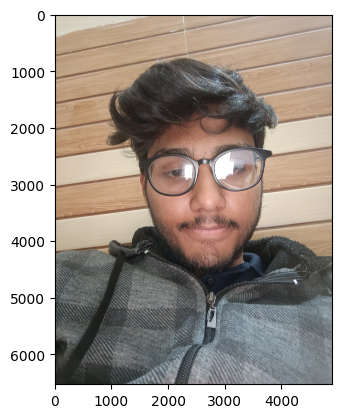

In [56]:
a=plt.imread('IMG20240302185510.jpg')
plt.imshow(a)

In [37]:
history=model.fit(train_data,validation_data=test_data,epochs=30)


Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 33.1816 - accuracy: 0.8667 - val_loss: 30.5438 - val_accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 30.9224 - accuracy: 0.9333 - val_loss: 56.0879 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 28.8364 - accuracy: 1.0000 - val_loss: 58.9949 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 27.4037 - accuracy: 0.8667 - val_loss: 59.0423 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 25.6332 - accuracy: 1.0000 - val_loss: 27.3395 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 24.3184 - accuracy: 0.8667 - val_loss: 40.4517 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 22.6525 - accuracy: 1.0000 - val_loss: 24.8990 - val_accuracy: 0.5000
Epoch 8/30
1/1 [===========

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

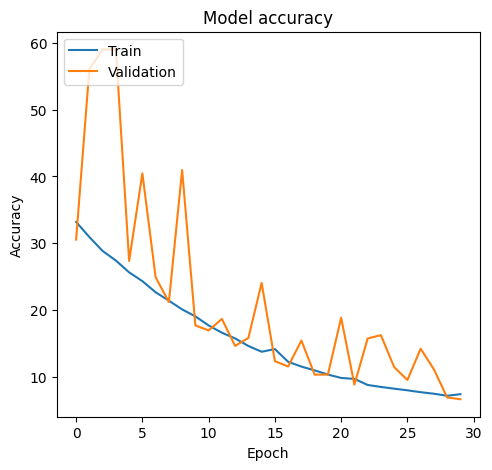

In [43]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')